In [8]:
import numpy as np

# Define paths
base_path_no = "C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic"
base_path_over = "C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic"

# Load Text embeddings
non_upsampled_embeddings = np.load(f"{base_path_no}/bert_embeddings_04sec_no_upsampled.npy")
upsampled_embeddings = np.load(f"{base_path_over}/bert_embeddings_04sec.npy")

# Check shapes
upsampled_shape = upsampled_embeddings.shape
non_upsampled_shape = non_upsampled_embeddings.shape

# Compare first 5 rows
sample_comparison = np.allclose(
    upsampled_embeddings[:5], non_upsampled_embeddings[:5], atol=1e-6
)

# Output the results
print("Upsampled shape:", upsampled_shape)
print("Non-upsampled shape:", non_upsampled_shape)
print("First 5 entries equal (within tolerance):", sample_comparison)


Upsampled shape: (23658, 768)
Non-upsampled shape: (23658, 768)
First 5 entries equal (within tolerance): False


In [30]:
import os

base_path_no = "C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic"
base_path_over = "C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic"

# Define files
modality_paths = {
    "Text": ("bert_embeddings_04sec_no_upsampled.npy", "bert_embeddings_04sec.npy"),
    "Audio": ("acoustic_scaled_56_04sec.npy", "acoustic_scaled_56_04sec.npy"),
    "Text+Audio": ("combined_embeddings_04sec_no_upsampled.npy", "combined_embeddings_04sec.npy"),
}
label_paths = ("labels_04sec_no_upsampled.npy", "labels_04sec.npy")

# Print modality combinations
print("Modality Embedding Paths:")
for modality, (no_file, over_file) in modality_paths.items():
    no_path = os.path.join(base_path_no, no_file)
    over_path = os.path.join(base_path_over, over_file)
    print(f"\n{modality}:")
    print(f" - No Upsampling   : {no_path}")
    print(f" - With Upsampling : {over_path}")

# Print label paths
print("\nLabel Paths:")
print(f" - No Upsampling   : {os.path.join(base_path_no, label_paths[0])}")
print(f" - With Upsampling : {os.path.join(base_path_over, label_paths[1])}")


Modality Embedding Paths:

Text:
 - No Upsampling   : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic\bert_embeddings_04sec_no_upsampled.npy
 - With Upsampling : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic\bert_embeddings_04sec.npy

Audio:
 - No Upsampling   : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic\acoustic_scaled_56_04sec.npy
 - With Upsampling : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic\acoustic_scaled_56_04sec.npy

Text+Audio:
 - No Upsampling   : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic\combined_embeddings_04sec_no_upsampled.npy
 - With Upsampling : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic\combined_embeddings_04sec.npy

Label Paths:
 - No Upsampling   : C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no

In [80]:
#Dense
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# File paths
paths = {
    "Text": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/bert_embeddings_04sec_no_upsampled.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy"
    },
    "Audio": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/acoustic_scaled_56_04sec.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy"
    },
    "Text+Audio": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/combined_embeddings_04sec_no_upsampled.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/combined_embeddings_04sec.npy"
    }
}

label_paths = {
    "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/labels_04sec_no_upsampled.npy",
    "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy"
}


def build_dnn_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
    return model

def run_kfold(X, y, input_dim, modality, upsampled_flag):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        model = build_dnn_model(input_dim)
        model.fit(X[train_idx], y[train_idx], epochs=30, batch_size=32, verbose=0)
        y_pred = (model.predict(X[test_idx]) > 0.5).astype(int)

        results.append({
            "Model": "DNN",
            "Modality": modality,
            "Upsampled": upsampled_flag,
            "Fold": fold + 1,
            "Accuracy": accuracy_score(y[test_idx], y_pred),
            "Precision": precision_score(y[test_idx], y_pred, zero_division=0),
            "Recall": recall_score(y[test_idx], y_pred, zero_division=0),
            "F1 Score": f1_score(y[test_idx], y_pred, zero_division=0),
            "AUC": roc_auc_score(y[test_idx], y_pred)
        })

    return results

all_results = []
for modality, mod_paths in paths.items():
    for condition, path in mod_paths.items():
        X = np.load(path)
        y = np.load(label_paths[condition])
        all_results += run_kfold(X, y, X.shape[1], modality, "Yes" if condition == "up" else "No")

df = pd.DataFrame(all_results)
df.to_csv("Results_04sec_ablation_dense/5fold_dense_upsample_folds.csv", index=False)
print(df)


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Model    Modality Upsampled  Fold  Accuracy  Precision    Recall  F1 Score  \
0    DNN        Text        No     1  0.915046   0.870793  0.739171  0.799601   
1    DNN        Text        No     2  0.920118   0.881235  0.727451  0.796992   
2    DNN        Text        No     3  0.915046   0.832783  0.751738  0.790188   
3    DNN        Text        No     4  0.919256   0.889810  0.722115  0.797240   
4    DNN        Text        No     5  0.864933   0.697324  0.750675  0.723017   
5    DNN        Text       Yes     1  0.951183   0.946653  0.834101  0.886820   
6    DNN        Text       Yes     2  0.949493   0.957796  0.800980  0.872397   
7    DNN        Text       Yes     3  0.943576   0.943645  0.781529  0.854970   
8    DNN        Text       Yes     4  0.942507   0.944444  0.784615  0.857143   
9    DNN        Text       Yes     5  0.850349   0.640811  0.825383  0.721479   
10   DNN       Audio        No     1  0.905748   0.846906  0.718894 

In [82]:
#1dcnn
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# File paths
paths = {
    "Text": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/bert_embeddings_04sec_no_upsampled.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy"
    },
    "Audio": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/acoustic_scaled_56_04sec.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy"
    },
    "Text+Audio": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/combined_embeddings_04sec_no_upsampled.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/combined_embeddings_04sec.npy"
    }
}

label_paths = {
    "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/labels_04sec_no_upsampled.npy",
    "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy"
}

def build_1dcnn_model(input_shape):
    return Sequential([
        Conv1D(128, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(),
        Dropout(0.3),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

def run_kfold(X, y, modality, upsampled_flag):
    X = np.expand_dims(X, axis=2)  # (samples, timesteps, features)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        model = build_1dcnn_model(X.shape[1:])
        model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
        model.fit(X[train_idx], y[train_idx], epochs=30, batch_size=32, verbose=0)
        y_pred = (model.predict(X[test_idx]) > 0.5).astype(int)

        results.append({
            "Model": "1DCNN",
            "Modality": modality,
            "Upsampled": upsampled_flag,
            "Fold": fold + 1,
            "Accuracy": accuracy_score(y[test_idx], y_pred),
            "Precision": precision_score(y[test_idx], y_pred, zero_division=0),
            "Recall": recall_score(y[test_idx], y_pred, zero_division=0),
            "F1 Score": f1_score(y[test_idx], y_pred, zero_division=0),
            "AUC": roc_auc_score(y[test_idx], y_pred)
        })

    return results

all_results = []
for modality, mod_paths in paths.items():
    for condition, path in mod_paths.items():
        X = np.load(path)
        y = np.load(label_paths[condition])
        all_results += run_kfold(X, y, modality, "Yes" if condition == "up" else "No")

df = pd.DataFrame(all_results)
df.to_csv("Results_04sec_ablation_1dcnn/5fold_1dcnn_upsample_folds.csv", index=False)
print(df)


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
    Model    Modality Upsampled  Fold  Accuracy  Precision    Recall  \
0   1DCNN        Text        No     1  0.910609   0.850636  0.740092   
1   1DCNN        Text        No     2  0.906382   0.836639  0.702941   
2   1DCNN        Text        No     3  0.914201   0.853946  0.719960   
3   1DCNN        Text        No     4  0.910590   0.844693  0.726923   
4   1DCNN        Text        No     5  0.849503   0.661538  0.735374   
5   1DCNN        Text       Yes     1  0.948014   0.944857  0.821198   
6   1DCNN        Text       Yes     2  0.945055   0.966830  0.771569   
7   1DCNN        Text       Yes     3  0.947380   0.949052  0.795432   
8   1DCNN        Text       Yes     4  0.943141   0.918567  0.813462   
9   1DCNN        Text       Yes     5  0.863031   0.668609  0.826283   
10  1DCNN       Audio        No     1  0.889899   0.793750  0.702304   
11  1DCNN       Audio        No     2  0.901733   0.838828  0.673529   
12  1DCNN       Audio  

In [84]:
#lstm
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# File paths
paths = {
    "Text": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/bert_embeddings_04sec_no_upsampled.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy"
    },
    "Audio": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/acoustic_scaled_56_04sec.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy"
    },
    "Text+Audio": {
        "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/combined_embeddings_04sec_no_upsampled.npy",
        "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/combined_embeddings_04sec.npy"
    }
}

label_paths = {
    "no": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/04sec_no_upsampling/Data_edaic/labels_04sec_no_upsampled.npy",
    "up": r"C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy"
}

def build_lstm_model(input_shape):
    return Sequential([
        LSTM(32, return_sequences=False, input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

def run_kfold(X, y, modality, upsampled_flag):
    X = np.expand_dims(X, axis=1)  # (samples, time_steps=1, features)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        model = build_lstm_model(X.shape[1:])
        model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
        model.fit(X[train_idx], y[train_idx], epochs=30, batch_size=32, verbose=0)
        y_pred = (model.predict(X[test_idx]) > 0.5).astype(int)

        results.append({
            "Model": "LSTM",
            "Modality": modality,
            "Upsampled": upsampled_flag,
            "Fold": fold + 1,
            "Accuracy": accuracy_score(y[test_idx], y_pred),
            "Precision": precision_score(y[test_idx], y_pred, zero_division=0),
            "Recall": recall_score(y[test_idx], y_pred, zero_division=0),
            "F1 Score": f1_score(y[test_idx], y_pred, zero_division=0),
            "AUC": roc_auc_score(y[test_idx], y_pred)
        })

    return results

all_results = []
for modality, mod_paths in paths.items():
    for condition, path in mod_paths.items():
        X = np.load(path)
        y = np.load(label_paths[condition])
        all_results += run_kfold(X, y, modality, "Yes" if condition == "up" else "No")

df = pd.DataFrame(all_results)
df.to_csv("Results_04sec_ablation_lstm/5fold_lstm_upsample_folds.csv", index=False)
print(df)


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Model    Modality Upsampled  Fold  Accuracy  Precision    Recall  F1 Score  \
0   LSTM        Text        No     1  0.916948   0.887025  0.730876  0.801415   
1   LSTM        Text        No     2  0.915258   0.865407  0.718627  0.785217   
2   LSTM        Text        No     3  0.913356   0.863581  0.704071  0.775711   
3   LSTM        Text        No     4  0.916297   0.863431  0.735577  0.794393   
4   LSTM        Text        No     5  0.853519   0.667468  0.749775  0.706231   
5   LSTM        Text       Yes     1  0.946746   0.959206  0.801843  0.873494   
6   LSTM        Text       Yes     2  0.949493   0.968788  0.791176  0.871020   
7   LSTM        Text       Yes     3  0.946323   0.951981  0.787488  0.861957   
8   LSTM        Text       Yes     4  0.946312   0.948630  0.799038  0.867432   
9   LSTM        Text       Yes     5  0.868949   0.685004  0.818182  0.745693   
10  LSTM       Audio        No     1  0.906171   0.858101  0.707834 

In [86]:
import pandas as pd

# Load the per-fold result CSVs
dnn_df = pd.read_csv("Results_04sec_ablation_dense/5fold_dense_upsample_folds.csv")
cnn_df = pd.read_csv("Results_04sec_ablation_1dcnn/5fold_1dcnn_upsample_folds.csv")
lstm_df = pd.read_csv("Results_04sec_ablation_lstm/5fold_lstm_upsample_folds.csv")

# Combine all results
combined_df = pd.concat([dnn_df, cnn_df, lstm_df], ignore_index=True)

# Group by model, modality, upsampling and calculate mean and std for each metric
summary_df = combined_df.groupby(["Model", "Modality", "Upsampled"]).agg(
    Accuracy_mean=("Accuracy", "mean"),
    Accuracy_std=("Accuracy", "std"),
    Precision_mean=("Precision", "mean"),
    Precision_std=("Precision", "std"),
    Recall_mean=("Recall", "mean"),
    Recall_std=("Recall", "std"),
    F1_mean=("F1 Score", "mean"),
    F1_std=("F1 Score", "std"),
    AUC_mean=("AUC", "mean"),
    AUC_std=("AUC", "std")
).reset_index()

# Display or save
print(summary_df)
summary_df.to_csv("summary_metrics_per_model.csv", index=False)


    Model    Modality Upsampled  Accuracy_mean  Accuracy_std  Precision_mean  \
0   1DCNN       Audio        No       0.895891      0.005361        0.807935   
1   1DCNN       Audio       Yes       0.893947      0.007729        0.806675   
2   1DCNN        Text        No       0.898257      0.027394        0.809490   
3   1DCNN        Text       Yes       0.929324      0.037109        0.889583   
4   1DCNN  Text+Audio        No       0.919857      0.020604        0.843739   
5   1DCNN  Text+Audio       Yes       0.940188      0.021962        0.907100   
6     DNN       Audio        No       0.910643      0.005910        0.844166   
7     DNN       Audio       Yes       0.912292      0.002499        0.850246   
8     DNN        Text        No       0.906880      0.023565        0.834389   
9     DNN        Text       Yes       0.927422      0.043245        0.886670   
10    DNN  Text+Audio        No       0.923957      0.020842        0.853195   
11    DNN  Text+Audio       Yes       0.

In [88]:
import pandas as pd

# Load averaged metrics with std (output from previous step)
df = pd.read_csv("summary_metrics_per_model.csv")

# Split into No and Yes groups
no_df = df[df["Upsampled"] == "No"].set_index(["Model", "Modality"])
yes_df = df[df["Upsampled"] == "Yes"].set_index(["Model", "Modality"])

# Calculate improvement (Yes - No)
improvement_df = yes_df[[
    "Accuracy_mean", "Precision_mean", "Recall_mean", "F1_mean", "AUC_mean"
]] - no_df[[
    "Accuracy_mean", "Precision_mean", "Recall_mean", "F1_mean", "AUC_mean"
]]

# Rename columns for clarity
improvement_df = improvement_df.rename(columns={
    "Accuracy_mean": "Accuracy_Improvement",
    "Precision_mean": "Precision_Improvement",
    "Recall_mean": "Recall_Improvement",
    "F1_mean": "F1_Improvement",
    "AUC_mean": "AUC_Improvement"
}).reset_index()

# Display or save
print(improvement_df)
improvement_df.to_csv("oversampling_improvement_summary.csv", index=False)



   Model    Modality  Accuracy_Improvement  Precision_Improvement  \
0  1DCNN       Audio             -0.001944              -0.001260   
1  1DCNN        Text              0.031067               0.080093   
2  1DCNN  Text+Audio              0.020331               0.063361   
3    DNN       Audio              0.001649               0.006080   
4    DNN        Text              0.020541               0.052281   
5    DNN  Text+Audio              0.016189               0.051343   
6   LSTM       Audio              0.003297               0.012312   
7   LSTM        Text              0.028489               0.073339   
8   LSTM  Text+Audio              0.015089               0.038571   

   Recall_Improvement  F1_Improvement  AUC_Improvement  
0           -0.007802       -0.005831        -0.003874  
1            0.080531        0.077941         0.048636  
2            0.029106        0.044966         0.023481  
3            0.000273        0.003061         0.001091  
4            0.067092   

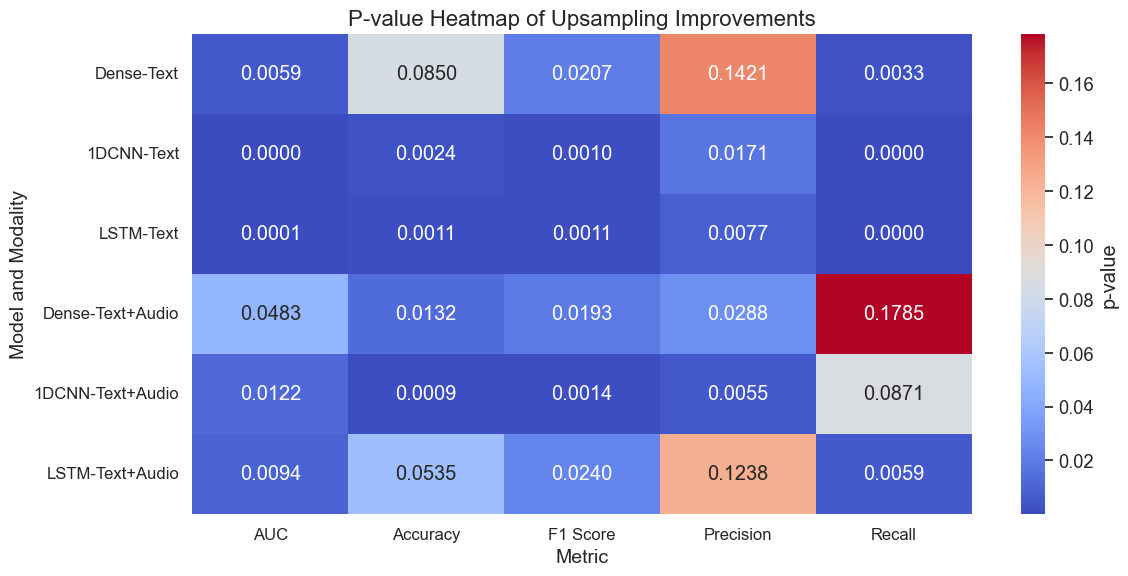

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# === Load per-fold result CSVs ===
dnn_df = pd.read_csv("Results_04sec_ablation_dense/5fold_dense_upsample_folds.csv")
cnn_df = pd.read_csv("Results_04sec_ablation_1dcnn/5fold_1dcnn_upsample_folds.csv")
lstm_df = pd.read_csv("Results_04sec_ablation_lstm/5fold_lstm_upsample_folds.csv")

# === Function to compute mean improvement (%) and p-value ===
def calculate_improvement_and_pvalue(df, model_name):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
    results = []

    for modality in df["Modality"].unique():
        if modality == "Audio":
            continue  # Exclude audio-only modality

        df_mod = df[df["Modality"] == modality]
        df_no = df_mod[df_mod["Upsampled"] == "No"].sort_values("Fold")
        df_yes = df_mod[df_mod["Upsampled"] == "Yes"].sort_values("Fold")

        for metric in metrics:
            before = df_no[metric].values
            after = df_yes[metric].values

            improvement = (after.mean() - before.mean()) * 100
            p_val = ttest_rel(after, before).pvalue

            results.append({
                "Model": model_name,
                "Modality": modality,
                "Metric": metric,
                "Improvement (%)": improvement,
                "p-value": p_val
            })

    return pd.DataFrame(results)

# === Compute improvements and p-values for all models ===
df_combined = pd.concat([
    calculate_improvement_and_pvalue(cnn_df, "1DCNN"),
    calculate_improvement_and_pvalue(dnn_df, "Dense"),
    calculate_improvement_and_pvalue(lstm_df, "LSTM")
], ignore_index=True)

# === Pivot and reorder rows ===
heatmap_df = df_combined.pivot(index=["Model", "Modality"], columns="Metric", values="p-value")
desired_order = [
    ("Dense", "Text"),
    ("1DCNN", "Text"),
    ("LSTM", "Text"),
    ("Dense", "Text+Audio"),
    ("1DCNN", "Text+Audio"),
    ("LSTM", "Text+Audio")
]
heatmap_df = heatmap_df.reindex(desired_order)

# === Plot heatmap ===
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={"label": "p-value"})
plt.title("P-value Heatmap of Upsampling Improvements", fontsize=16)
plt.ylabel("Model and Modality", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()
